# Entrega 1

El conjunto de datos sobre abalones proviene de un estudio realizado en Tasmania, Australia, y su objetivo es predecir la edad de los abalones (un tipo de molusco) a partir de mediciones físicas. Tradicionalmente, la edad de los abalones se determina cortando la concha, tiñéndola y contando los anillos bajo un microscopio, lo que resulta en un proceso tedioso. En lugar de esto, el dataset utiliza mediciones como la longitud, diámetro, altura, y varios pesos para predecir el número de anillos, que corresponde a la edad del abulón. Los datos fueron recopilados por Warwick J. Nash y otros investigadores en un estudio sobre la biología poblacional de los abalones. El conjunto de datos original fue ajustado para su uso en técnicas de machine learning eliminando valores faltantes y escalando los valores continuos.

Los datos fueron extraidos de: https://archive.ics.uci.edu/dataset/1/abalone y se pueden encontrar en el repositorio de github: https://github.com/bautistaturri/EntregaIAA/

Primero importamos las librerias necesarias para el trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Analisis Introductorio

In [2]:
df = pd.read_csv("C:/Users/MABEL/Desktop/EntregaIAA/abalone.csv")
df.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7





### Descripción de los atributos:

- **Sex**: Variable nominal con tres posibles valores: M (macho), F (hembra) e I (infante). Esta variable indica el sexo del abalone.
- **Length**: Variable continua que mide la longitud del caparazón del abalone en milímetros.
- **Diameter**: Variable continua que mide el diámetro, perpendicular a la longitud, también en milímetros.
- **Height**: Variable continua que mide la altura del caparazón del abalone con la carne aún dentro, en milímetros.
- **Whole weight**: Variable continua que mide el peso total del abalone en gramos.
- **Shucked weight**: Variable continua que mide el peso de la carne del abalone en gramos, una vez que se ha quitado la concha.
- **Viscera weight**: Variable continua que mide el peso del intestino después de haber sido drenado de sangre, en gramos.
- **Shell weight**: Variable continua que mide el peso de la concha seca después de haber sido removida del abalone, en gramos.
- **Rings**: Variable entera, que indica el número de anillos en el caparazón del abalone. Este es el valor objetivo en el problema, y se suma 1.5 a los anillos para obtener la edad aproximada del abalone en años.


In [13]:
df.shape

(4177, 9)

**Contiene 4177 filas y 9 columnas.**


In [5]:
df.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Veamos si hay valores faltantes (cabe aclarar que en la informacion de los datos ya indica que NO hay valores faltantes)

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

### Analisis exploratorio

In [14]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


La división de los valores continuos por 200 se realiza como una técnica de preprocesamiento para normalizar los datos y facilitar el entrenamiento de una red neuronal artificial (ANN, por sus siglas en inglés). Las redes neuronales suelen funcionar mejor cuando los valores de entrada están en una escala más uniforme y pequeña, lo que ayuda a acelerar el entrenamiento y a mejorar la estabilidad numérica al evitar problemas como grandes variaciones en los pesos. Sin embargo, para este trabajo debemos utilizar las escalas normales. Esto porque no se utilizara un modelo de ANN. Ademas, sirve para inferir de una forma mas precisa sobre los resultados.



Para esto multiplicamos los valores de las columnas continuas por 200

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years


In [3]:
columns_to_rescale = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
df[columns_to_rescale] = df[columns_to_rescale] * 200

In [4]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,91.0,73.0,19.0,102.8,44.9,20.2,30.0,15
1,M,70.0,53.0,18.0,45.1,19.9,9.7,14.0,7
2,F,106.0,84.0,27.0,135.4,51.3,28.3,42.0,9
3,M,88.0,73.0,25.0,103.2,43.1,22.8,31.0,10
4,I,66.0,51.0,16.0,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113.0,90.0,33.0,177.4,74.0,47.8,49.8,11
4173,M,118.0,88.0,27.0,193.2,87.8,42.9,52.1,10
4174,M,120.0,95.0,41.0,235.2,105.1,57.5,61.6,9
4175,F,125.0,97.0,30.0,218.9,106.2,52.2,59.2,10


El problema a resolver es predecir la **edad de los abulones** utilizando como variable objetivo (target) la variable **Rings**. Dado que la cantidad de anillos en un abulón está directamente relacionada con su edad, este valor se utilizará para hacer predicciones. La edad se puede estimar sumando un valor constante a la cantidad de anillos. Este problema se aborda como un problema de **regresión**, ya que se busca predecir un valor continuo (edad), y la métrica esperada para evaluar el modelo podría ser el **error cuadrático medio (MSE)** , **raiz cuadrada del error cuadratico medio (RMSE)**, **Error absoluto medio (MAE)**.


Dado que el objetivo es predecir la edad de los abulones (derivada de la cantidad de anillos), dos atributos que podrían tener un buen poder predictivo son el peso entero (Whole weight) y la longitud (Length). El peso entero refleja la masa total del abulón, lo que debería estar correlacionado con su crecimiento y, por ende, con su edad. Por otro lado, la longitud es una medida directa del tamaño del caparazón, lo que también podría indicar el desarrollo del abulón a lo largo de los años. Se espera que abulones más grandes y pesados tengan más anillos, lo que se traduciría en una mayor edad.

Para esto vamos a realizar unos graficos para visualizar la tendencia de estas variables en funcion de los anillos

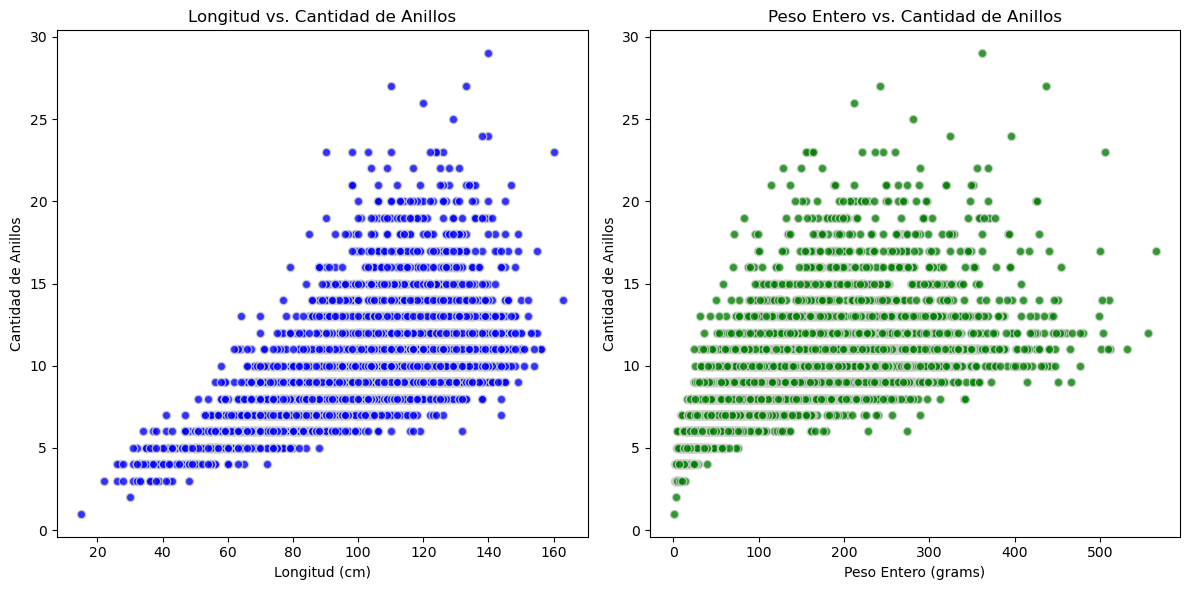

In [8]:
# Crear los gráficos de dispersión
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de Longitud vs. Anillos
axes[0].scatter(df['Length'], df['Rings'], color='b', edgecolors='lightgrey', alpha= 0.8)
axes[0].set_title('Longitud vs. Cantidad de Anillos')
axes[0].set_xlabel('Longitud (cm)')
axes[0].set_ylabel('Cantidad de Anillos')

# Gráfico de Peso Entero vs. Anillos
axes[1].scatter(df['Whole_weight'], df['Rings'], color='g', edgecolors='lightgrey', alpha= 0.8)
axes[1].set_title('Peso Entero vs. Cantidad de Anillos')
axes[1].set_xlabel('Peso Entero (grams)')
axes[1].set_ylabel('Cantidad de Anillos')

plt.tight_layout()
plt.show()

En ambos casos, se observa **una relación directamente proporcional** entre las variables analizadas y la cantidad de anillos, siendo especialmente notable en el caso de la longitud. Para continuar con el análisis, se procederá a realizar **modelos de regresión lineal**, con el fin de evaluar estas variables y observar su capacidad predictiva respecto a la cantidad de anillos.

### Mododelo lineal

In [5]:
# Seleccionar las características y el objetivo
X = df[['Length', 'Whole_weight']]  # Features
y = df['Rings']  # Targt

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [11]:
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 6.79314210968095
Coeficiente de Determinación (R²): 0.3310252888961682


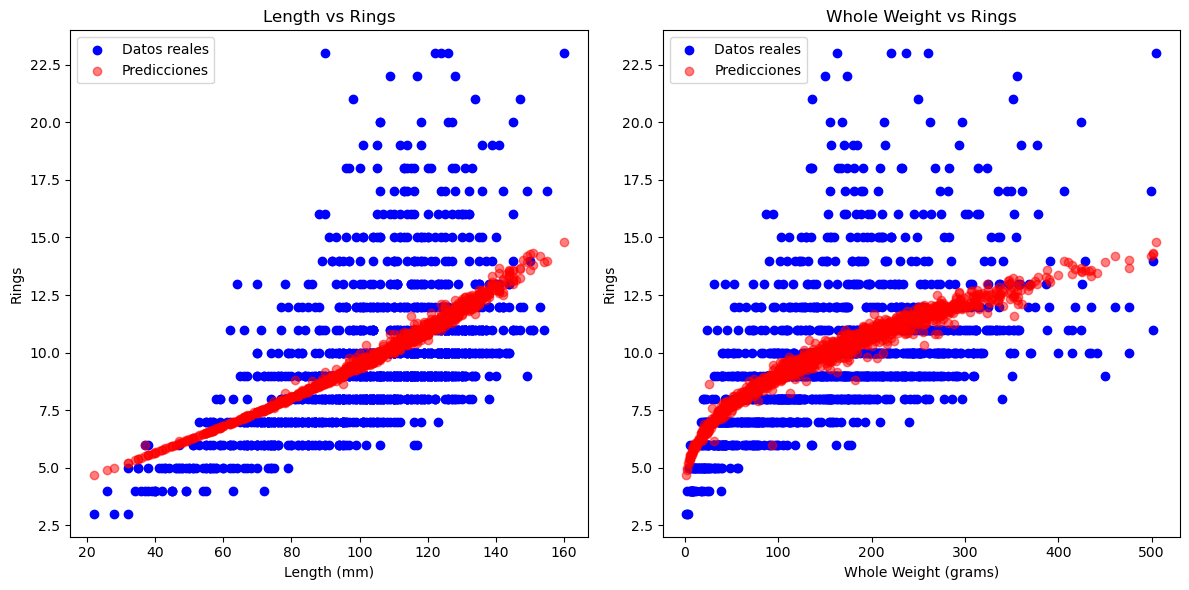

In [9]:

# Crear un gráfico para visualizar la relación
plt.figure(figsize=(12, 6))

# Gráfica para Length vs Rings
plt.subplot(1, 2, 1)
plt.scatter(X_test['Length'], y_test, color='blue', label='Datos reales')
plt.scatter(X_test['Length'], y_pred, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('Length (mm)')
plt.ylabel('Rings')
plt.title('Length vs Rings')
plt.legend()

# Gráfica para Whole_weight vs Rings
plt.subplot(1, 2, 2)
plt.scatter(X_test['Whole_weight'], y_test, color='blue', label='Datos reales')
plt.scatter(X_test['Whole_weight'], y_pred, color='red', label='Predicciones', alpha=0.5)
plt.xlabel('Whole Weight (grams)')
plt.ylabel('Rings')
plt.title('Whole Weight vs Rings')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

Los gráficos generados muestran la relación entre los valores reales de anillos (la variable objetivo) y las predicciones del modelo de regresión lineal, utilizando las características de longitud (Length) y peso total (Whole_weight) de los abalones. En cada gráfico, los puntos azules representan los valores reales de anillos, mientras que los puntos rojos indican las predicciones realizadas por el modelo. Una cercanía entre estos puntos sugiere que el modelo está realizando buenas predicciones, mientras que una dispersión significativa indica que el modelo podría no estar ajustando adecuadamente los datos. Estos gráficos permiten evaluar visualmente el desempeño del modelo y la calidad de sus predicciones en relación a los valores observados.

### Grafico de los errores

A continuacion se realizara el grafico de los errores de los valores reales con los valores predichos

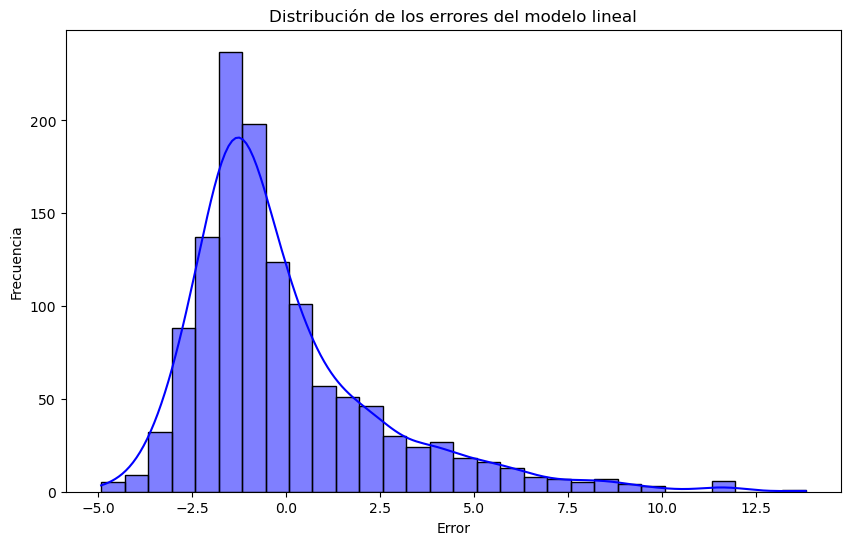

In [10]:
# Predecir los valores de test
y_pred = model.predict(X_test)

# Calcular los errores (residuos)
errors = y_test - y_pred

# Graficar los errores
plt.figure(figsize=(10,6))
sns.histplot(errors, bins=30, kde=True, color='blue')
plt.title('Distribución de los errores del modelo lineal')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()


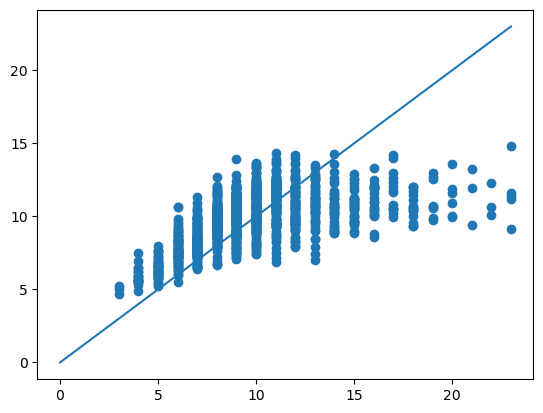

In [14]:
plt.scatter(y_test,y_pred)
plt.plot([0,23],[0,23])